1. 《8 号 Python 增强规范》（Python Enhacement Proposal #8），以下简称 PEP8； 《Google Python 风格规范》（Google Python Style Guide），以下简称
2. Google Style，这是源自 Google 内部的风格规范。公开发布的社区版本，是为了让 Google 旗下所有 Python 开源项目的编程风格统一。（http://google.github.io/styleguide/pyguide.html）

相对来说，Google Style 是比 PEP8 更严格的一个编程规范。因为 PEP8 的受众是个人和小团队开发者，而 Google Style 能够胜任大团队，企业级，百万行级别代码库。

# 统一的编程规范为什么重要？ 
统一的编程规范能提高开发效率。而开发效率，关乎三类对象，也就是阅读者、编程者和机器。

他们的优先级是**阅读者的体验 >> 编程者的体验 >> 机器的体验**。

## 阅读者的体验 >> 编程者的体验

写过代码的人可能都有体会，在我们的实际工作中，真正在打字的时间，远比阅读或者 debug 的时间要少。事实正是如此，研究表明，软件工程中 80% 的时间都在阅读代码。所以，为了提高开发效率，我们要优化的，不是你的打字时间，而是团队阅读的体验。

```python
# 错误示例
if (a <= 0):
   return
elif (a > b):
   return
else:
  b -= a

# 正确示例
if (transfer_amount <= 0):
   raise Exception('...')
elif (transfer_amount > balance):
   raise Exception('...')
else:
  balance -= transfer_amount
```

再举一个例子，Google Style 2.2 条规定，Python 代码中的 import 对象，只能是 package 或者 module。
```python
# 错误示例
from mypkg import Obj
from mypkg import my_func

my_func([1, 2, 3])

# 正确示例
import numpy as np
import mypkg

np.array([6, 7, 8])
```

以上错误示例在语法上完全合法（因为没有符号冲突 name collisions），但是对于读者来讲，它们的可读性太差了。因为 my_func 这样的名字，如果没有一个 package name 提供上下文语境，读者很难单独通过 my_func 这个名字来推测它的可能功能，也很难在 debug 时根据 package name 找到可能的问题。 

反观正确示例，虽然 array 是如此大众脸的名字，但因为有了 numpy 这个 package 的暗示，读者可以一下子反应过来，哦，这是一个 numpy array。不过这里要注意区别，这个例子和符号冲突（name collisions）是正交（orthogonal）的两个概念，即使没有符号冲突，我们也要遵循这样的 import 规范。

## 编程者的体验 >> 机器的体验

常常见到的一个错误倾向，是过度简化自己的代码。一个典型的例子，就是盲目地使用 Python 的 list comprehension。
```Python
# 错误示例
result = [(x, y) for x in range(10) for y in range(5) if x * y > 10]
```

我敢打赌，一定很少有人能一口气写出来这么复杂的 list comprehension。这不仅容易累着自己，也让阅读者看得很累。其实，如果你用一个简单的 for loop，会让这段代码更加简洁明了，自己也更为轻松。

```Python
# 正确示例
result = []
for x in range(10):
  for y in range(5):
     if x * y > 10:
       result.append((x, y))
```


## 机器的体验也很重要

一些危险的编程风格，不仅会影响程序正确性，也容易成为代码效率的瓶颈。

```python
# 错误示例
x = 27
y = 27
print(x is y)

x = 721
y = 721
print(x is y)
```

看起来 is 是比较内存地址，那么两个结果应该都是一样的，可是实际上打印出来的，却分别是 True 和 False！

原因是在 **CPython（Python 的 C 实现）的实现中，把 -5 到 256 的整数做成了 singleton，也就是说，这个区间里的数字都会引用同一块内存区域**，所以上面的 27 和下面的 27 会指向同一个地址，运行结果为 True。

但是** -5 到 256 之外的数字，会因为你的重新定义而被重新分配内存**，所以两个 721 会指向不同的内存地址，结果也就是 False 了。

所以，即使你已经清楚，is 比较对象的内存地址，你也应该在代码风格中，避免去用 is 比较两个 Python 整数的地址。
```python
# 正确示例
x = 27
y = 27
print(x == y)

x = 721
y = 721
print(x == y)
```

看完这个例子，我们再看 == 在比较值的时候，是否总能如你所愿呢？同样的，你可以自己先判断一下运行结果。

```python
# 错误示例
x = MyObject()
print(x == None)
```
打印结果是 False 吗？不一定。因为对于类来说，== 的结果，取决于它的 __eq__() 方法的具体实现。MyObject 的作者完全可能这样实现：

```python
class MyObject(object):
 def __eq__(self, other):
   if other:
     return self.field == other.field
   return True
```
**正确的是在代码风格中，当你和 None 比较时候永远使用 is**:

```python
# 正确示例
x = MyObject()
print(x is None)
```

Python 中还有隐式布尔转换。比如：

```python
# 错误示例
def pay(name, salary=None):
 if not salary:
   salary = 11
 print(name, "is compensated", salary, "dollars")
```
如果有人调用 pay(“Andrew”) ，会打印什么呢？“Andrew is compensated 11 dollars”。当你明确想要比较对象是否是 None 时，一定要显式地用 is None。

```python
# 正确示例
def pay(name, salary=None):
 if salary is not None:
   salary = 11
 print(name, "is compensated", salary, "dollars")
```

不规范的编程习惯也会导致程序效率问题，我们看下面的代码有什么问题：

```python
# 错误示例
adict = {i: i * 2 for i in range(10000000)}

for key in adict.keys():
   print("{0} = {1}".format(key, adict[key]))

```

**`keys()` 方法会在遍历前生成一个临时的列表，导致上面的代码消耗大量内存并且运行缓慢。**正确的方式，是使用默认的 iterator。默认的 iterator 不会分配新内存，也就不会造成上面的性能问题:

```python
# 正确示例
adict = {i: i * 2 for i in range(10000000)}

for key in adict:
   print("{0} = {1}".format(key, adict[key]))
```


## 整合进开发流程的自动化工具

一旦确定了整个团队同意的代码规范，就一定要强制执行。如何执行呢？靠强制代码评审和强制静态或者动态 linter。把共识写进代码里，让机器来自动化这些流程。比如：
1. 在代码评审工具里，添加必须的编程规范环节； 
2. 把团队确定的代码规范写进 Pylint 里（https://www.pylint.org/），能够在每份代码提交前自动检查，不通过的代码无法提交。

整合之后，你的团队工作流程就会变成这样：

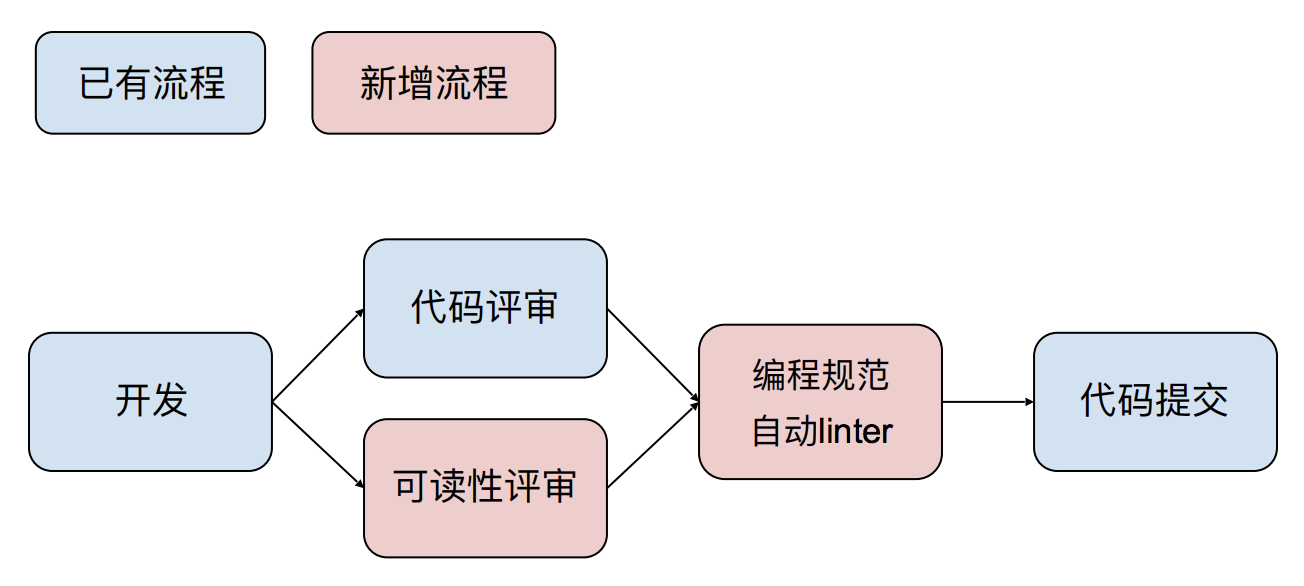
